In [2]:
# Dependencies
import requests
import pandas as pd
import json
import numpy as np
import pprint as pprint
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [3]:
raw_data= pd.read_csv("../Resources/zillow_data.csv")
raw_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
0,61148,0,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,132227.158462,...,513064.819267,521106.942820,526709.757886,529852.723408,532739.517232,536614.909083,539756.911224,542498.833639,544796.246875,548908.778223
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222152.961968,...,483238.626925,487008.197655,487740.644864,486249.969249,484563.782495,483155.040379,481172.398003,478960.458716,477829.581123,478617.619647
2,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,112898.162200,...,279587.901824,282543.997782,284092.001252,284287.573977,283684.397980,282690.504761,281117.092555,279305.188642,277752.055947,276950.323631
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,72326.248058,...,323320.422839,323582.127606,322854.935372,321141.219564,319297.240310,318652.879789,317396.440188,317356.363695,317934.056006,320049.843886
4,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,181767.202252,...,463719.895826,463689.682953,460142.037448,454155.731421,447851.951556,441110.142904,434006.030604,427856.292727,422973.617117,419470.057769


In [4]:
raw_data['CountyName'].value_counts()

Washington County     321
Jefferson County      275
Los Angeles County    274
Montgomery County     237
Franklin County       229
                     ... 
Kimble County           1
Bristol City            1
Musselshell County      1
Brule County            1
Arthur County           1
Name: CountyName, Length: 1831, dtype: int64

In [5]:
#CLEAN DATA

#Remove non-relevant years
df = raw_data.drop(raw_data.columns[9:216], axis=1)
#Filter by state = Texas
df=df.loc[df['State'] == "TX"]
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2017-04-30,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,343068.942359,...,483238.626925,487008.197655,487740.644864,486249.969249,484563.782495,483155.040379,481172.398003,478960.458716,477829.581123,478617.619647
2,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,183613.214671,...,279587.901824,282543.997782,284092.001252,284287.573977,283684.397980,282690.504761,281117.092555,279305.188642,277752.055947,276950.323631
4,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,282862.635342,...,463719.895826,463689.682953,460142.037448,454155.731421,447851.951556,441110.142904,434006.030604,427856.292727,422973.617117,419470.057769
6,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,134773.629362,...,187682.181121,189673.422183,191243.674118,192305.236231,193063.807323,193840.481225,194377.210218,195357.486876,196526.739646,198047.393260
9,91733,9,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,183457.652075,...,271780.587717,273971.396421,274979.401096,275216.378920,275115.598231,274842.352854,273919.763511,272495.581068,271222.301521,270638.716372


In [6]:
df_county = df.groupby("CountyName")["2023-03-31"].mean()
df_county


CountyName
Anderson County    207778.623088
Andrews County     198874.467062
Angelina County    161055.551233
Aransas County     286760.479386
Archer County      124190.297699
                       ...      
Wood County        257118.383556
Yoakum County      130754.601004
Young County       140322.760900
Zapata County       96680.301905
Zavala County       78032.433267
Name: 2023-03-31, Length: 241, dtype: float64

In [7]:
#Saves Summary df to csv
df_county.to_csv("sample.csv", index=True)

In [8]:
df["CountyName"].value_counts()
 

Harris County     130
Dallas County      79
Bexar County       67
Tarrant County     63
Travis County      45
                 ... 
Mason County        1
Reagan County       1
Sutton County       1
Donley County       1
Terrell County      1
Name: CountyName, Length: 241, dtype: int64

In [9]:
#Early change boxplot
#Total
df['Total Change']=(df['2023-03-31']-df['2017-04-30'])/df['2017-04-30']
#df1['Total Change'] = df1['Total Change'].map("{:.2%}".format)

#For each year
df['2017 % Change']=(df['2017-12-31']-df['2017-04-30'])/df['2017-04-30']
#df['2017-2018 % Change'] = df['2017-2018 % Change'].map("{:.2%}".format)
df['2018 % Change']=(df['2018-12-31']-df['2017-12-31'])/df['2017-12-31']
df['2019 % Change']=(df['2019-12-31']-df['2018-12-31'])/df['2018-12-31']
df['2020 % Change']=(df['2020-12-31']-df['2019-12-31'])/df['2019-12-31']
df['2021 % Change']=(df['2021-12-31']-df['2020-12-31'])/df['2020-12-31']
df['2022 % Change']=(df['2022-12-31']-df['2021-12-31'])/df['2021-12-31']

In [10]:
#Creates a Summary df
df_summary=df[['CountyName', 'City', '2017 % Change', 
        '2018 % Change', '2019 % Change', '2020 % Change',
        '2021 % Change', '2022 % Change', 'Total Change','2023-03-31']]
df_summary = df_summary.dropna()
df_summary=df_summary.groupby('CountyName').mean().reset_index()
#How to get last 3 columns formatted right?
df_summary.head()

,CountyName,2017 % Change,2018 % Change,2019 % Change,2020 % Change,2021 % Change,2022 % Change,Total Change,2023-03-31
0,Anderson County,0.015321,0.026635,0.072334,0.101193,0.175890,0.112700,0.621855,175981.441989
1,Andrews County,-0.001802,0.053630,0.123243,0.061747,0.066292,-0.024441,0.321051,198874.467062
2,Angelina County,0.012616,0.021743,0.135287,0.085698,0.158220,0.000645,0.505089,161055.551233
3,Aransas County,0.032459,0.034495,0.065238,0.109672,0.178124,0.091454,0.608920,286760.479386
4,Archer County,-0.001726,0.094549,0.048471,0.114011,0.112665,0.082778,0.569620,144530.051053


In [11]:
# Cleaning " County" out of the column values so we can match it up with other dataframes.

df_summary["CountyName"] = df_summary["CountyName"].str.replace(" County","")
df_summary.head()

,CountyName,2017 % Change,2018 % Change,2019 % Change,2020 % Change,2021 % Change,2022 % Change,Total Change,2023-03-31
0,Anderson,0.015321,0.026635,0.072334,0.101193,0.175890,0.112700,0.621855,175981.441989
1,Andrews,-0.001802,0.053630,0.123243,0.061747,0.066292,-0.024441,0.321051,198874.467062
2,Angelina,0.012616,0.021743,0.135287,0.085698,0.158220,0.000645,0.505089,161055.551233
3,Aransas,0.032459,0.034495,0.065238,0.109672,0.178124,0.091454,0.608920,286760.479386
4,Archer,-0.001726,0.094549,0.048471,0.114011,0.112665,0.082778,0.569620,144530.051053


In [12]:
# split up total change into fifths
# fifths = df_summary["Total Change"].quantile([0.2,0.4,0.6,0.8])

df_summary["Score"]=pd.qcut(df_summary["Total Change"], q=[0,.2,.4,.6,.8,1], labels=[1,2,3,4,5])
# df_summary.to_csv("housing_price_score.csv",index=True)
df_summary.head()

,CountyName,2017 % Change,2018 % Change,2019 % Change,2020 % Change,2021 % Change,2022 % Change,Total Change,2023-03-31,Score
0,Anderson,0.015321,0.026635,0.072334,0.101193,0.175890,0.112700,0.621855,175981.441989,3
1,Andrews,-0.001802,0.053630,0.123243,0.061747,0.066292,-0.024441,0.321051,198874.467062,1
2,Angelina,0.012616,0.021743,0.135287,0.085698,0.158220,0.000645,0.505089,161055.551233,2
3,Aransas,0.032459,0.034495,0.065238,0.109672,0.178124,0.091454,0.608920,286760.479386,3
4,Archer,-0.001726,0.094549,0.048471,0.114011,0.112665,0.082778,0.569620,144530.051053,3


In [16]:
clean_df = df_summary.rename(columns={
    "2017 % Change":"2017 % Housing Change",
    "2018 % Change":"2018 % Housing Change",
    "2019 % Change":"2019 % Housing Change",
    "2020 % Change":"2020 % Housing Change",
    "2021 % Change":"2021 % Housing Change",
    "2022 % Change":"2022 % Housing Change",
    "Total Change":"Housing Value % Change",
    "2023-03-31":"Current Housing Value",
    "Score":"Housing Score"
})

clean_df.to_csv("housing_price_score.csv", index=False)

clean_df.head()

,CountyName,2017 % Housing Change,2018 % Housing Change,2019 % Housing Change,2020 % Housing Change,2021 % Housing Change,2022 % Housing Change,Housing Value % Change,Current Housing Value,Housing Score
0,Anderson,0.015321,0.026635,0.072334,0.101193,0.175890,0.112700,0.621855,175981.441989,3
1,Andrews,-0.001802,0.053630,0.123243,0.061747,0.066292,-0.024441,0.321051,198874.467062,1
2,Angelina,0.012616,0.021743,0.135287,0.085698,0.158220,0.000645,0.505089,161055.551233,2
3,Aransas,0.032459,0.034495,0.065238,0.109672,0.178124,0.091454,0.608920,286760.479386,3
4,Archer,-0.001726,0.094549,0.048471,0.114011,0.112665,0.082778,0.569620,144530.051053,3


In [17]:
#Saves Summary df to csv
df_summary.to_csv("sample1.csv", index=True)

In [18]:
df_summary["Ave House Value (Mar '23)"]=df_summary['2023-03-31']
df_summary1=df_summary[["Ave House Value (Mar \'23)","Total Change"]]
df_summary1.describe(include='float64')

,Ave House Value (Mar '23),Total Change
count,211.000000,211.000000
mean,210191.215213,0.595651
std,116365.047633,0.231988
min,51395.705853,0.103070
25%,132042.741768,0.417610
50%,183460.563318,0.579587
75%,264249.683744,0.764944
max,655275.199060,1.177120


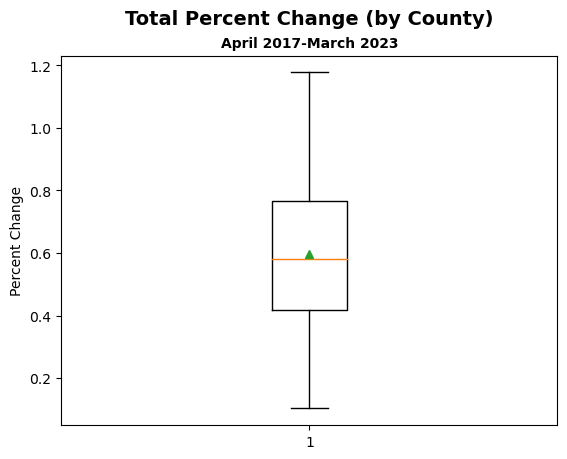

In [19]:
#Boxplot of Total Change %
plt.boxplot(df_summary['Total Change'], showmeans=True, flierprops=dict(markerfacecolor='red', marker='s'))
plt.title("April 2017-March 2023", fontsize=10, fontweight='bold', color='black')
plt.text(0.5, 1.1, "Total Percent Change (by County)", ha='center', va='center', fontsize=14, fontweight='bold', color='black', transform=plt.gca().transAxes)
plt.ylabel("Percent Change")
plt.show()

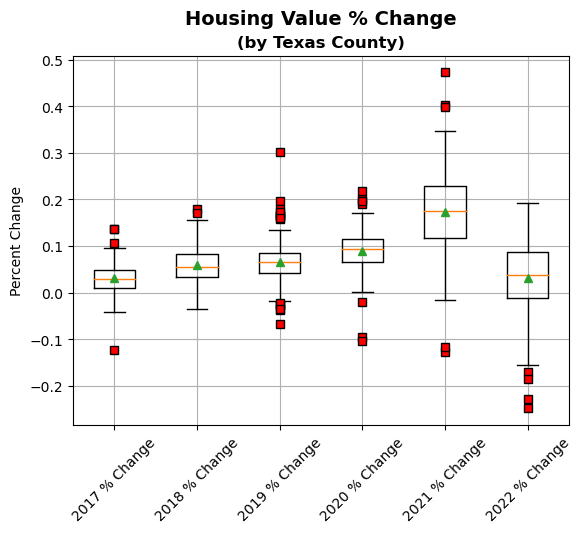

In [20]:
#Boxplot of Change % by year
data= [df_summary['2017 % Change'], df_summary['2018 % Change'], df_summary['2019 % Change'], 
        df_summary['2020 % Change'], df_summary['2021 % Change'], df_summary['2022 % Change']]
labels=['2017 % Change', 
        '2018 % Change', '2019 % Change', '2020 % Change',
        '2021 % Change', '2022 % Change']
plt.boxplot(data, labels=labels, 
        showmeans=True, flierprops=dict(markerfacecolor='red', marker='s'))
plt.xticks(rotation=45)
plt.text(0.5, 1.1, "Housing Value % Change", ha='center', va='center', fontsize=14, fontweight='bold', color='black', transform=plt.gca().transAxes)
plt.title("(by Texas County)", fontsize=12, fontweight='bold', color='black')
plt.grid()
plt.ylabel("Percent Change")
plt.show()